# Problem 1, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 1 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 1F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 4C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [14]:
def loss(X, Y, w):
    """
    Calculate the squared loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    """

    Loss = 0
    N = X.shape[0]

    for i in range(N):
        Loss += (Y[i] - np.dot(w, X[i])) ** 2
    return Loss / N


def gradient(x, y, w):
    """
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    """

    return -2 * (y - np.dot(w, x)) * x



def SGD(X, Y, w_start, eta, N_epochs):
    """
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    """

    W = np.zeros((N_epochs, len(w_start)))
    losses = np.zeros(N_epochs)

    w = w_start.copy()

    for epoch in range(N_epochs):
        W[epoch] = w.copy()
        losses[epoch] = loss(X, Y, w)

        # Shuffle the data points
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        Y_shuffled = Y[indices]

        for i in range(X.shape[0]):
            x_i = X_shuffled[i]
            y_i = Y_shuffled[i]
            grad = gradient(x_i, y_i, w)
            w -= eta * grad

    return W[-1], losses

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [15]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.

    Inputs:
        filename: GeneratorExitiven as a string.

    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=",")

Now, load the dataset in `../data/sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [46]:
data = load_data("../data/sgd_data.csv")
X = data[:, :4]
Y = data[:, 4]

w_start = [0.001, 0.001, 0.001, 0.001]
eta = 10**-15
N_epochs = 800

bias = 0.001

# append the bias to X and w_start
X = np.hstack((X, np.ones((X.shape[0], 1))))
w_start = np.append(w_start, bias)

# print first few data points
print(X[:5])
print(Y[:5])

w, losses = SGD(X, Y, w_start, eta, N_epochs)
print("Final weights:", w)

[[8.55834 3.08451 1.79961 6.61568 1.     ]
 [4.08455 8.66603 2.8698  1.67996 1.     ]
 [1.93701 8.9219  8.99454 0.56534 1.     ]
 [3.11286 7.36286 4.35027 7.14242 1.     ]
 [5.52064 3.46109 6.07592 2.77215 1.     ]]
[  0.45023  -7.29982 -74.71018  22.2565  -66.01461]
Final weights: [0.00099972 0.00099986 0.00099964 0.00099992 0.00099996]


## Problem 1G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

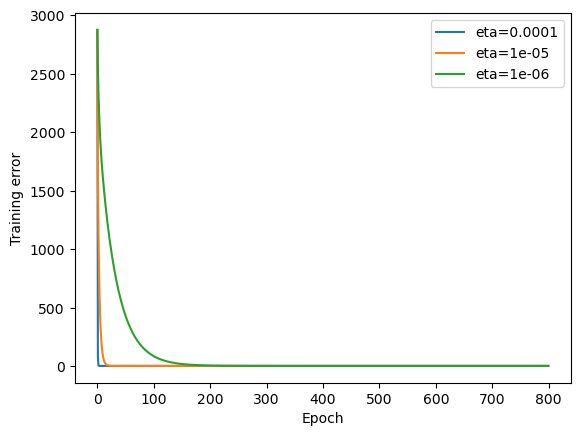

In [54]:
# ==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
# ==============================================

eta_vals = [1e-4, 1e-5, 1e-6]
w_start = [0.001, 0.001, 0.001, 0.001, bias]
N_epochs = 800

plt.figure()

for eta in eta_vals:
    w_final, losses = SGD(X, Y, np.array(w_start), eta, N_epochs)
    plt.plot(losses, label=f"eta={eta}")

plt.xlabel("Epoch")
plt.ylabel("Training error")
plt.legend()
plt.show()

## Problem 1H

Provide your code for computing the least-squares analytical solution below.

In [57]:
print(w_final)

[ -5.9955637    4.01133369 -11.93670945   8.98697636  -0.23412539]


In [58]:
w_closed = np.linalg.inv(X.T @ X) @ (X.T @ Y)
print(w_closed)

[ -5.99157048   4.01509955 -11.93325972   8.99061096  -0.31644251]


## Problem 1I
Is there any reason to use SGD when a closed-form solution exists?

Yes, as for large datasets calculating this is very computationally heavy.